In [25]:
import pandas as pd

In [26]:
df=pd.read_csv('train.csv')

In [27]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


## Correlation heatmap

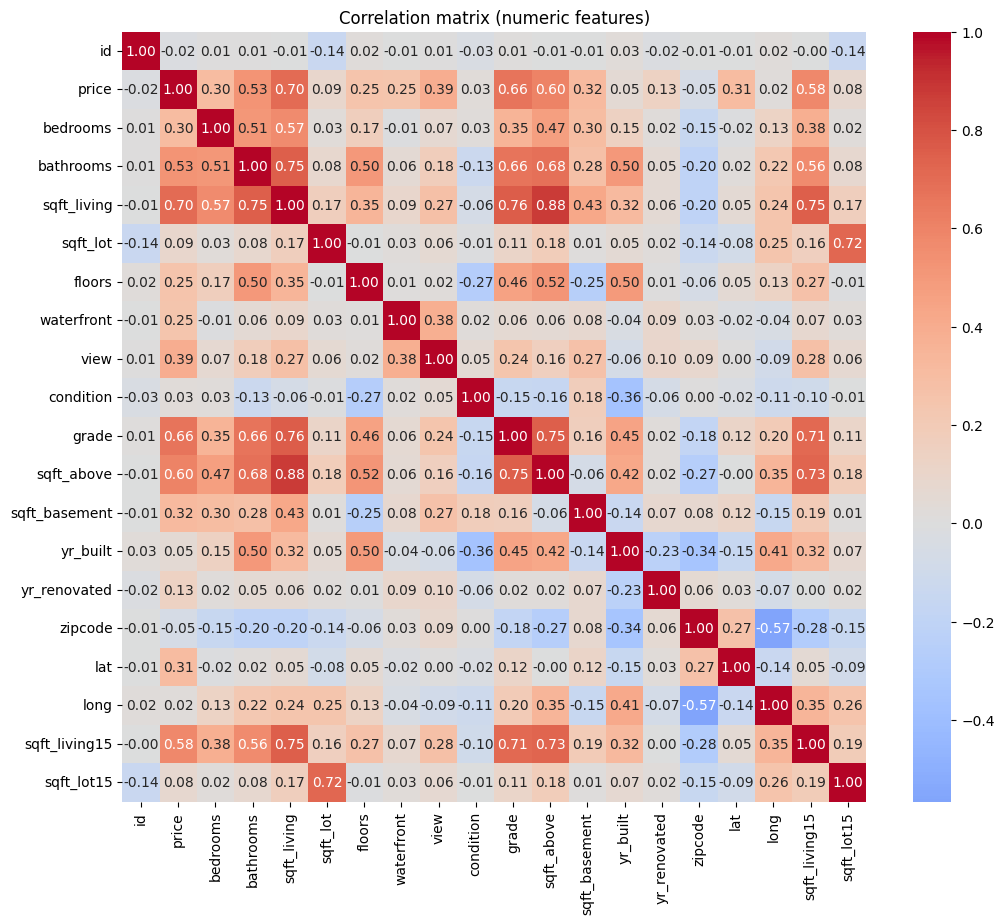


Correlations with price (sorted):


zipcode         -0.054517
id              -0.020260
long             0.024279
condition        0.031333
yr_built         0.048307
sqft_lot15       0.076060
sqft_lot         0.088526
yr_renovated     0.133075
waterfront       0.245221
floors           0.251428
bedrooms         0.304454
lat              0.310008
sqft_basement    0.320301
view             0.390534
bathrooms        0.525487
sqft_living15    0.581781
sqft_above       0.602648
grade            0.664266
sqft_living      0.700933
Name: price, dtype: float64

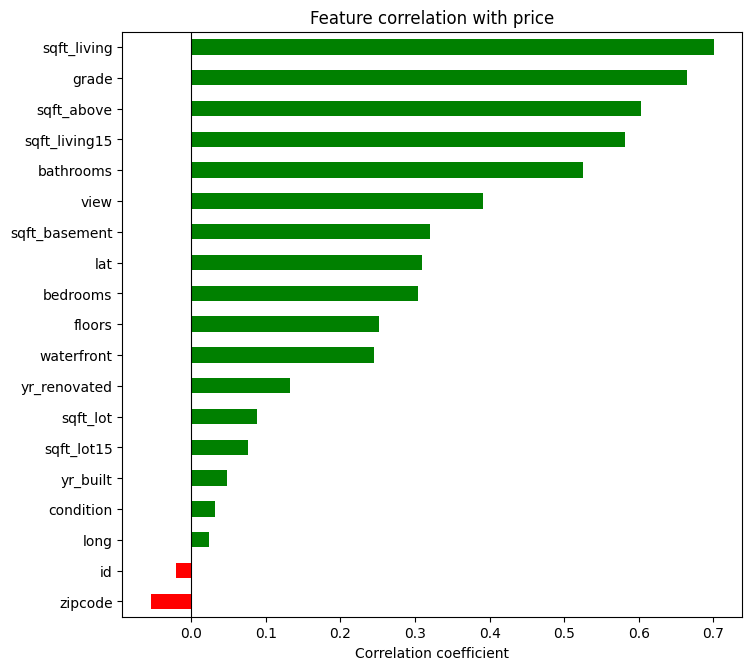

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Select numeric columns (safe-guard)
num = df.select_dtypes(include=['number']).copy()

if 'price' not in num.columns:
    print("No 'price' column found in dataframe - please check column name.")
else:
    # Correlation matrix (numeric features)
    corr = num.corr()

    # Full heatmap for numeric features
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation matrix (numeric features)')
    plt.show()

    # Correlation of each feature with price (sorted)
    price_corr = corr['price'].drop('price').sort_values()
    print('\nCorrelations with price (sorted):')
    display(price_corr)

    # Horizontal barplot for easier visualization
    plt.figure(figsize=(8, max(3, 0.4*len(price_corr))))
    colors = ['green' if v>0 else 'red' for v in price_corr]
    price_corr.plot(kind='barh', color=colors)
    plt.xlabel('Correlation coefficient')
    plt.title('Feature correlation with price')
    plt.axvline(0, color='k', linewidth=0.8)
    plt.show()

In [ ]:
pk.eyJ1IjoibWFkdmV4IiwiYSI6ImNtanI4eTg1eTN0ejUzZXF6cmw2Ym1iMnAifQ.Ku4G7fhj8lNDjjOJdLeMLw

In [ ]:
# Latitude: 47.4362	Longitude: -122.187	

In [ ]:
import requests

MAPBOX_TOKEN = "pk.eyJ1IjoibWFkdmV4IiwiYSI6ImNtanI4eTg1eTN0ejUzZXF6cmw2Ym1iMnAifQ.Ku4G7fhj8lNDjjOJdLeMLw"

lat, lon = 47.4362, -122.187

url = (
    f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
    f"{lon},{lat},15/512x512?access_token={MAPBOX_TOKEN}"
)

r = requests.get(url)

with open("a5.png", "wb") as f:
    f.write(r.content)

## Code

In [28]:
train=df[:int(len(df)*0.7)]
test=df[int(len(df)*0.7):]

In [29]:
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np

MAPBOX_TOKEN = "pk.eyJ1IjoibWFkdmV4IiwiYSI6ImNtanJnZ3ZkeDNzeHkzZ3F4MWJ1bTJpMmIifQ.AYaLaqRBZy3GDBbtH5Bavg"
def get_image_array(lat, lon, zoom=12, size=256):
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},{zoom}/{size}x{size}?access_token={MAPBOX_TOKEN}"
    )
    r = requests.get(url)
    img = Image.open(BytesIO(r.content)).convert("RGB")
    img = np.array(img)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img


In [30]:
import torch
import torchvision.models as models
import torchvision.transforms as T

resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Identity()  # remove classifier
resnet.eval()

transform = T.Compose([
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def image_to_features(img_np):
    img = transform(img_np).unsqueeze(0)  # (1,3,224,224)
    with torch.no_grad():
        feat = resnet(img)
    return feat.numpy().flatten()  # (512,)

/Users/madhav/opt/anaconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/madhav/opt/anaconda3/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [76]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11341,2794700120,20140912T000000,496000,3,3.50,3090,27598,2.0,0,2,...,9,2020,1070,1995,0,98070,47.3541,-122.453,2180,17085
11342,7211400525,20140530T000000,249950,4,1.00,1290,5000,1.5,0,0,...,7,1290,0,1957,0,98146,47.5130,-122.358,1440,2500
11343,8951900065,20140929T000000,315000,3,1.00,1070,9497,1.0,0,0,...,7,1070,0,1955,0,98028,47.7425,-122.230,1710,9561
11344,8078050140,20141002T000000,245000,3,2.00,1700,8448,1.0,0,0,...,7,1700,0,1996,0,98022,47.2077,-122.011,1350,8587


In [48]:
train_price=train['price']
train_features=train.drop('price', axis=1)
test_price=test['price']
test_features=test.drop('price', axis=1)

In [79]:
x = []
y = []


for i in range(len(train)):
    img = get_image_array(train.loc[i,"lat"], train.loc[i,"long"])
    img = img.astype(np.float32) / 255.0
    img_feat = image_to_features(img)

    tabular_feat = train.loc[i].drop("price")

    final_feat = np.concatenate([img_feat, tabular_feat])
    x.append(final_feat)
    y.append(train.loc[i]["price"])

    if(i%1000==0):
        print(f"{i} rows have been processed")

x = np.array(x)
y = np.array(y)


0 rows have been processed
1000 rows have been processed
2000 rows have been processed
3000 rows have been processed
4000 rows have been processed
5000 rows have been processed
6000 rows have been processed
7000 rows have been processed
8000 rows have been processed
9000 rows have been processed
10000 rows have been processed
11000 rows have been processed


In [81]:
x_feature_df=pd.DataFrame(x)
x_feature_df.to_csv("x_feature.csv",index=False)

y_feature_df=pd.DataFrame(y)
y_feature_df.to_csv("y_feature.csv",index=False)


In [67]:
len(tabular_feat)

20

In [6]:
import pandas as pd
x=pd.read_csv("x_feature.csv")
y=pd.read_csv("y_feature.csv")

In [8]:
import numpy as np
x = np.delete(x, 513, axis=1)

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def train_xgboost_regressor(
    X_train,
    y_train,
    X_val=None,
    y_val=None,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    verbose=50
):
    """
    Train XGBoost regressor on pre-split data.
    """

    # -------------------------
    # Model
    # -------------------------
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        tree_method="hist",
        n_jobs=-1
    )

    # -------------------------
    # Training
    # -------------------------
    if X_val is not None and y_val is not None:
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            early_stopping_rounds=early_stopping_rounds,
            verbose=verbose
        )
    else:
        model.fit(
            X_train,
            y_train,
            verbose=verbose
        )

    return model


In [10]:
model=train_xgboost_regressor(x,y)

## Running model on validation data 

procuring validation dataset and extracting feaetures

In [33]:
x_test = []
y_test = []


for i in range(11346,16209):
    img = get_image_array(test.loc[i,"lat"], test.loc[i,"long"])
    img = img.astype(np.float32) / 255.0
    img_feat = image_to_features(img)

    tabular_feat = test.loc[i].drop("price")

    final_feat = np.concatenate([img_feat, tabular_feat])
    x_test.append(final_feat)
    y_test.append(test.loc[i]["price"])

    if(i%1000==0):
        print(f"{i} rows have been processed")

x_test = np.array(x_test)
y_test = np.array(y_test)

12000 rows have been processed
13000 rows have been processed
14000 rows have been processed
15000 rows have been processed
16000 rows have been processed


In [34]:
x_test_df = pd.DataFrame(x_test)
y_test_df = pd.DataFrame(y_test)
x_test_df.to_csv("x_test_features.csv", index=False)
y_test_df.to_csv("y_test_features.csv", index=False)

In [37]:
x_test = np.delete(x_test, 513, axis=1)

In [38]:
from sklearn.metrics import mean_absolute_error
pred = model.predict(x_test)

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)

In [40]:
r2

0.8871533870697021

# Running on test data to get the Predictions

In [45]:
real_test=pd.read_csv("test.csv")

procuring the features out of satellite images

In [ ]:
real_test_id=real_test["id"]
real_test=real_test.drop("date", axis=1) # date column creates problem in model

In [47]:
x_real_test = []

for i in range(len(real_test)):
    img = get_image_array(real_test.loc[i,"lat"], real_test.loc[i,"long"])
    img = img.astype(np.float32) / 255.0
    img_feat = image_to_features(img)

    tabular_feat = real_test.loc[i]

    final_feat = np.concatenate([img_feat, tabular_feat])
    x_real_test.append(final_feat)


    if(i%1000==0):
        print(f"{i} rows have been processed")

x_real_test = np.array(x_real_test)
x_real_test_df = pd.DataFrame(x_real_test)
x_real_test_df.to_csv("x_real_test.csv", index=False)

0 rows have been processed
1000 rows have been processed
2000 rows have been processed
3000 rows have been processed
4000 rows have been processed
5000 rows have been processed


In [48]:
real_pred = model.predict(x_real_test)

In [49]:
real_pred

array([ 381147.  ,  843156.56, 1104138.9 , ...,  294444.84, 1682818.1 ,
        337196.44], shape=(5404,), dtype=float32)

In [50]:
real_test_id

0       2591820310
1       7974200820
2       7701450110
3       9522300010
4       9510861140
           ...    
5399    7732500270
5400    3856903515
5401    2557000400
5402    4386700135
5403    7399000360
Name: id, Length: 5404, dtype: int64

In [51]:
Predictions=pd.DataFrame(columns=["id","predicted_price"])

In [52]:
Predictions["id"] = real_test_id
Predictions["predicted_price"] = real_pred

In [57]:
Predictions.to_csv("Predictions.csv")

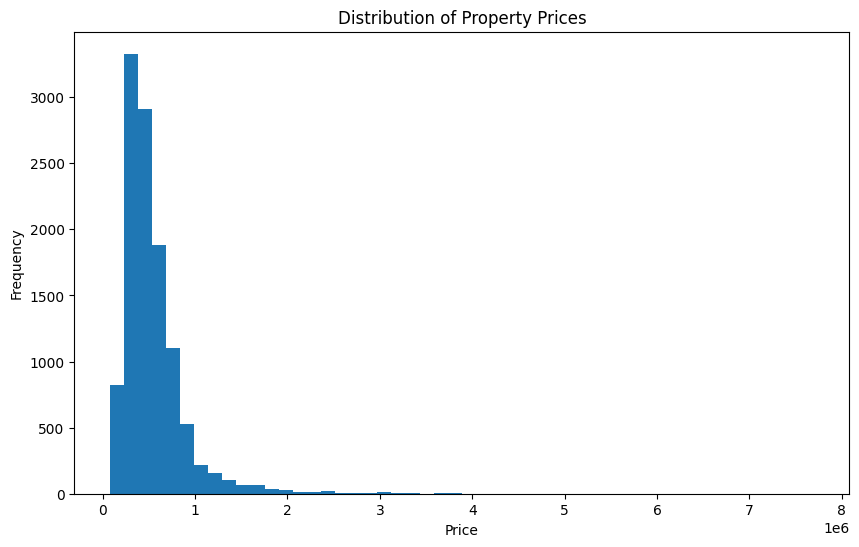

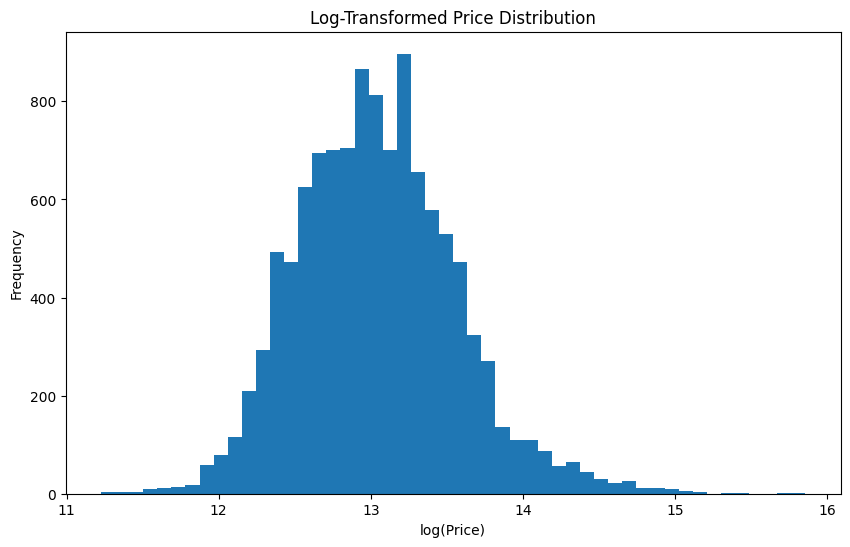

In [56]:
import matplotlib.pyplot as plt
import numpy as np

y=train["price"]
plt.figure(figsize=(10,6))
plt.hist(y, bins=50)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(np.log1p(y), bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")
plt.show()

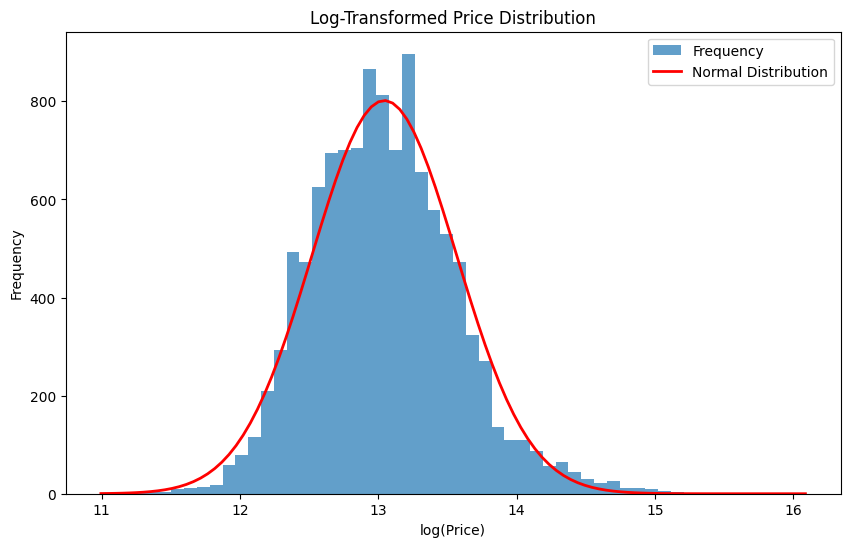

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

y=train["price"]
data_log = np.log1p(y)

plt.figure(figsize=(10,6))

# 1. Plot Histogram
# We save the return values (n, bins, patches) to calculate bin width later
n, bins, patches = plt.hist(data_log, bins=50, alpha=0.7, label='Frequency')

# 2. Calculate Mean and Standard Deviation of the data
mu, std = norm.fit(data_log)

# 3. Generate points for the x-axis
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 4. Generate the Normal Distribution (PDF)
p = norm.pdf(x, mu, std)

# 5. Scale the PDF to match the Frequency y-axis
# Scale factor = Total count * Bin width
bin_width = bins[1] - bins[0]
p_scaled = p * len(data_log) * bin_width

# 6. Plot the Line
plt.plot(x, p_scaled, 'r', linewidth=2, label='Normal Distribution')

plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

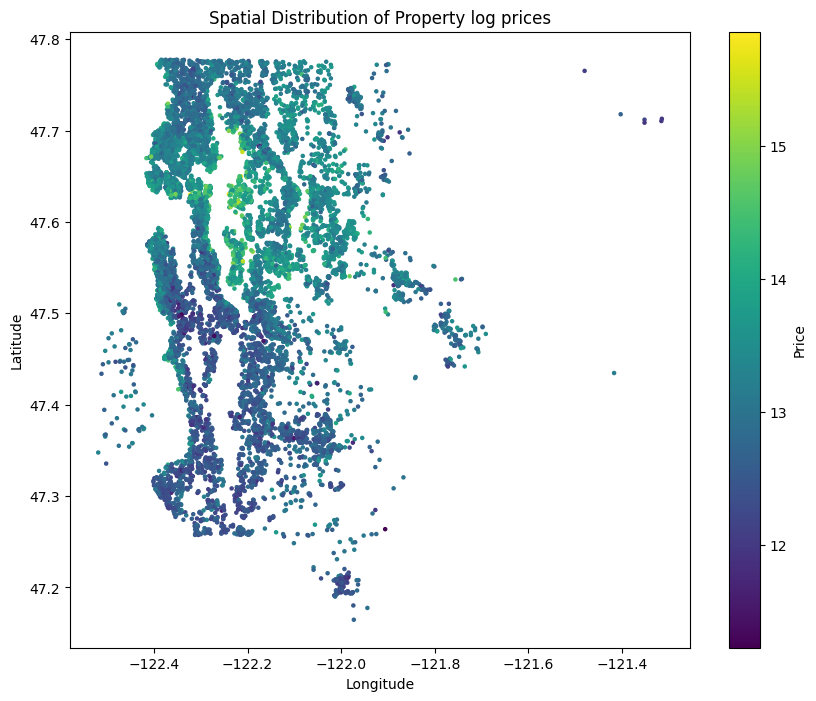

In [63]:
plt.figure(figsize=(10,8))
y=np.log1p(train["price"])
plt.scatter(train["long"], train["lat"], c=y, cmap="viridis", s=5)
plt.colorbar(label="Price")
plt.title("Spatial Distribution of Property log prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()